In [1]:
# Importing the dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# files to load 
city_load = 'Resources/city_data.csv'
ride_load = 'Resources/ride_data.csv'

In [2]:
# Creating the initial data frames
city_df = pd.read_csv(city_load)
ride_df = pd.read_csv(ride_load)

# Combine the data frames 
combined_df = pd.merge(city_df, ride_df, on= 'city')
combined_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


In [3]:
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


In [4]:
# creating data frames based on city type
urban = combined_df.loc[(combined_df['type']== 'Urban')]
suburban =combined_df.loc[(combined_df['type']== 'Suburban')]
rural = combined_df.loc[(combined_df['type']== 'Rural')]

# Urban Variabes
avg_urban = urban.groupby(['city'])['fare'].mean()
rides_urban = urban.groupby(['city']).count()['ride_id']
drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()

#Suburban variables
avg_suburban = suburban.groupby(['city'])['fare'].mean()
rides_suburban = suburban.groupby(['city']).count()['ride_id']
drivers_suburban = suburban.groupby(['city'])['driver_count'].value_counts()

# Rural Variables
avg_rural = rural.groupby(['city'])['fare'].mean()
rides_rural = rural.groupby(['city']).count()['ride_id']
drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()


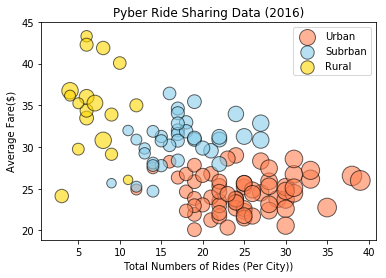

In [19]:
# creating the scatter plots
plt.scatter(rides_urban, avg_urban, marker= 'o' , s = rides_urban*10, facecolors = 'Coral' , edgecolors = 'black',
           alpha =0.6, label = 'Urban')
plt.scatter(rides_suburban, avg_suburban, marker= 'o' , s = rides_suburban*10, facecolors = 'SkyBlue' , edgecolors = 'black',
           alpha =0.6, label = 'Subrban')
plt.scatter(rides_rural, avg_rural, marker= 'o' , s = rides_suburban*10, facecolors = 'Gold' , edgecolors = 'black',
          alpha =0.6, label = 'Rural')

#creating the title and legends
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.legend(loc='upper right')
plt.show()

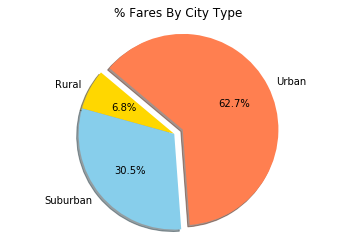

In [23]:
# Total Fare by City Type
total_fares = combined_df.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% Fares By City Type")
plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

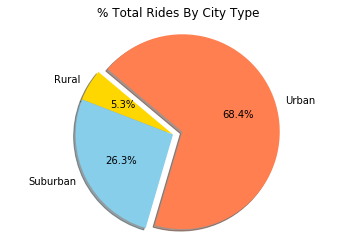

In [21]:
# Total Rides by City Type
total_rides = combined_df.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% Total Rides By City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

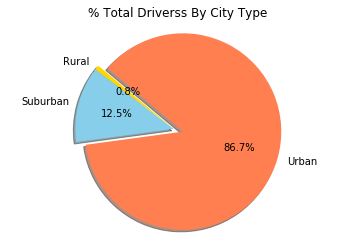

In [24]:
total_drivers = combined_df.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% Total Driverss By City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()